In [ ]:
#############################################################
# CITATION:                                                 #
# The graphing code and the function                        #
# get_all_representations_as_matrix() was written for       #
# Charissa Plattner's CS 224U project in the Spring.        #
#############################################################

In [1]:
from collections import *
from numpy import *
import numpy as np
import csv
import sys
import json
import re
import nltk.data
import string
import sklearn.cluster
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import xml.etree.ElementTree as ET
import sklearn.decomposition
import song_parsing
import collections
import sklearn.feature_extraction.text
from sklearn.decomposition import PCA
csv.field_size_limit(sys.maxsize);

In [2]:
N_CLUSTERS = 3

def get_all_words_and_word_counts(songs):
    all_words = set([])
    song_counters = {}
    for song in songs:
        words = []
        for line in songs[song].split('\n'):
            line = line.translate(None, string.punctuation)
            words.extend(line.replace('"', '').split(' '))

        counter = collections.Counter(words)
        song_counters[song] = counter
        all_words = all_words.union( counter.iterkeys() )

    length = len(all_words)
    all_words = sorted(all_words)
    return all_words, song_counters
    
def get_all_representations_as_matrix(songs, song_counters, all_words):
    all_song_representations = [[] for i in range(len(songs))]
    for word in all_words:
        for song_index, song in enumerate(songs):
            all_song_representations[song_index].append(song_counters[song[0]][word] * 1.0) 
    return all_song_representations
    
def get_clusters(songs):
    all_words, song_counters = get_all_words_and_word_counts(songs)
    songs = list(songs.iteritems())

    clusterer = sklearn.cluster.KMeans(n_clusters=N_CLUSTERS, max_iter=500) #make max_iter higher later

    all_song_representations = get_all_representations_as_matrix(songs, song_counters, all_words)
    
    #TF-IDF
    tfidf = sklearn.feature_extraction.text.TfidfTransformer(norm='l2',smooth_idf=True)
    communities = tfidf.fit_transform(all_song_representations).toarray()

    # #SVD
    svd = sklearn.decomposition.TruncatedSVD(n_components=len(all_song_representations[0])/2)
    all_song_representations = svd.fit_transform(all_song_representations)

    all_song_representations = np.array(all_song_representations) # as NP array
    cluster_labels = clusterer.fit_predict(all_song_representations)
    
    clusters = {}
    for song_index, cluster in enumerate(cluster_labels):
        if cluster not in clusters:
            clusters[cluster] = [songs[song_index][0]]
        else:
            clusters[cluster].append(songs[song_index][0])
    return all_song_representations, clusters, cluster_labels

In [11]:
songs = song_parsing.get_all_song_lyrics("Taylor Swift")
all_song_representations, clusters, cluster_labels = get_clusters(songs)

In [12]:
svd = sklearn.decomposition.TruncatedSVD(n_components=2)
t = svd.fit_transform(all_song_representations)

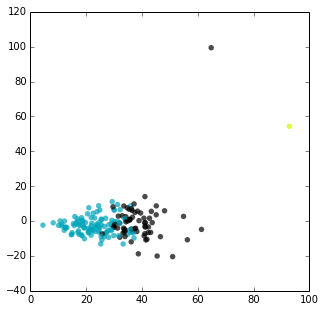

In [13]:
%matplotlib inline
plt.figure(figsize=(5,5))
colors = cm.spectral(cluster_labels.astype(float) / N_CLUSTERS)
plt.scatter(t[:, 0], t[:, 1], marker='.', s=120, lw=0, alpha=0.7, c=colors)
plt.show()

In [14]:
print collections.Counter(cluster_labels)

fala = []
for cluster in clusters:
    fala.append( clusters[cluster] )
    
print fala

Counter({1: 104, 0: 68, 2: 1})
[['I Knew You Were Trouble', 'Tim McGraw', 'All You Had To Do Was Stay', 'Need You Now', 'Stay Stay Stay', 'Breathe', '22', 'Spinning Around', 'If This Was A Movie', 'Never Grow Up', 'Back To December', 'Writing Songs About You', 'I Wished On A Plane', 'Everything Has Changed', 'Nevermind', 'Begin Again', 'The Way I Loved You', 'Last Kiss', 'Til Brad Pitt Comes Along', 'Drops Of Jupiter', 'Enchanted', 'Jump Then Fall', 'Wait For Me', 'Come Back... Be Here', 'Shake It Off', 'This Here Guitar', 'Love Story', 'One Thing', 'Cross My Heart', 'Blank Space', 'Firefly', 'Down Came The Rain', 'Better Than Revenge', 'You Belong With Me', 'Dear John', 'Sweeter Than Fiction', "Ain't Nothing 'Bout You", 'The Story Of Us', 'Hey Stephen', "Baby, Don't You Break My Heart Slow", 'The Best Day', 'Superman', "Who I've Always Been", 'Forever & Always (Piano Version)', 'Welcome Distraction', 'Haunted', 'I Knew You Were Trouble (Remix)', 'Sparks Fly', 'Tell Me Why', 'Tell Me',